<img src="https://certificate.tpq.io/taim_logo.png" width="350px" align="right">

# Artificial Intelligence in Finance

## Execution & Deployment

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [1]:
import os
import time
import numpy as np
import pandas as pd
from pprint import pprint
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'

## Oanda Account

``pip install --upgrade git+https://github.com/yhilpisch/tpqoa.git``

Configuration file ``aiif.cfg``:

    [oanda]
    account_id = XYZ-ABC-...
    access_token = ZYXCAB...
    account_type = practice

In [2]:
import tpqoa

In [3]:
api = tpqoa.tpqoa('./aiif.cfg')

In [4]:
ins = api.get_instruments()

In [5]:
ins[:5]

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD')]

## Data Retrieval 

In [6]:
raw = api.get_history(instrument='EUR_USD',
                      start='2018-01-01',
                      end='2020-07-31',
                      granularity='D',
                      price='A')

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 671 entries, 2018-01-01 22:00:00 to 2020-07-30 21:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         671 non-null    float64
 1   h         671 non-null    float64
 2   l         671 non-null    float64
 3   c         671 non-null    float64
 4   volume    671 non-null    int64  
 5   complete  671 non-null    bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 32.1 KB


In [8]:
raw.head()

,o,h,l,c,volume,complete
time,,,,,,
2018-01-01 22:00:00,1.20101,1.20819,1.20051,1.20610,35630,True
2018-01-02 22:00:00,1.20620,1.20673,1.20018,1.20170,31354,True
2018-01-03 22:00:00,1.20170,1.20897,1.20049,1.20710,35187,True
2018-01-04 22:00:00,1.20692,1.20847,1.20215,1.20327,36478,True
2018-01-07 22:00:00,1.20301,1.20530,1.19564,1.19717,27618,True


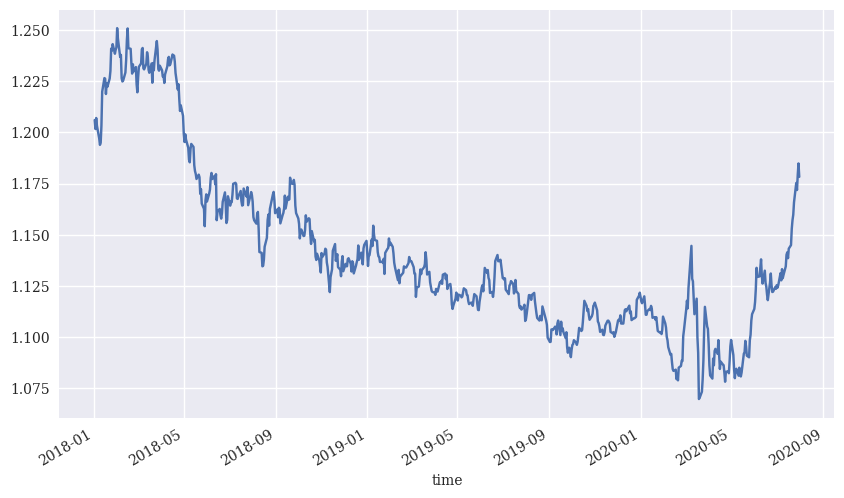

In [9]:
raw['c'].plot(figsize=(10, 6));

In [10]:
%%time
raw = api.get_history(instrument='EUR_USD',
                      start='2020-07-01',
                      end='2020-07-31',
                      granularity='M1',
                      price='M') 

CPU times: user 920 ms, sys: 28.1 ms, total: 948 ms
Wall time: 8.12 s


In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30729 entries, 2020-07-01 00:00:00 to 2020-07-31 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         30729 non-null  float64
 1   h         30729 non-null  float64
 2   l         30729 non-null  float64
 3   c         30729 non-null  float64
 4   volume    30729 non-null  int64  
 5   complete  30729 non-null  bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 1.4 MB


In [12]:
raw.tail()

,o,h,l,c,volume,complete
time,,,,,,
2020-07-30 23:56:00,1.18736,1.18758,1.18722,1.18757,57,True
2020-07-30 23:57:00,1.18756,1.18756,1.18734,1.18734,49,True
2020-07-30 23:58:00,1.18736,1.18737,1.18713,1.18717,36,True
2020-07-30 23:59:00,1.18718,1.18724,1.18714,1.18722,31,True
2020-07-31 00:00:00,1.18721,1.18752,1.18695,1.18750,120,True


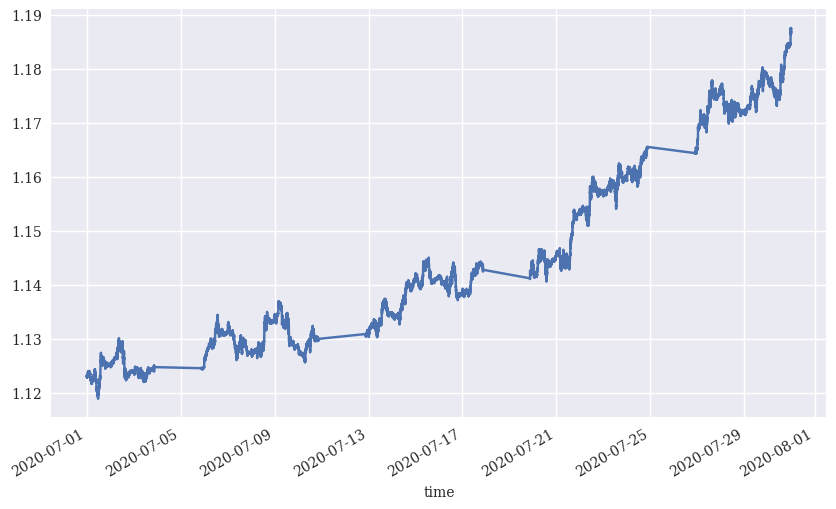

In [13]:
raw['c'].plot(figsize=(10, 6));

In [14]:
# api.stream_data('EUR_USD', stop=10)

## Order Execution 

In [15]:
order = api.create_order('EUR_USD', units=25000,
                         suppress=True, ret=True)
pprint(order)

{'accountBalance': '99694.75',
 'accountID': '101-001-26247300-001',
 'batchID': '421',
 'commission': '0.0',
 'financing': '0.0',
 'fullPrice': {'asks': [{'liquidity': '10000000', 'price': 1.08842}],
               'bids': [{'liquidity': '10000000', 'price': 1.08828}],
               'closeoutAsk': 1.08842,
               'closeoutBid': 1.08828,
               'type': 'PRICE'},
 'fullVWAP': 1.08842,
 'gainQuoteHomeConversionFactor': '1.0',
 'guaranteedExecutionFee': '0.0',
 'halfSpreadCost': '1.75',
 'id': '422',
 'instrument': 'EUR_USD',
 'lossQuoteHomeConversionFactor': '1.0',
 'orderID': '421',
 'pl': '0.0',
 'price': 1.08842,
 'reason': 'MARKET_ORDER',
 'requestID': '61125482624597736',
 'time': '2023-07-05T09:20:26.773908209Z',
 'tradeOpened': {'guaranteedExecutionFee': '0.0',
                 'halfSpreadCost': '1.75',
                 'initialMarginRequired': '544.175',
                 'price': 1.08842,
                 'tradeID': '422',
                 'units': '25000.0'},
 '

In [16]:
def print_details(order):
    details = (order['time'][:-7], order['instrument'], order['units'],
               order['price'], order['pl'])
    return details

In [17]:
print_details(order)

('2023-07-05T09:20:26.773', 'EUR_USD', '25000.0', 1.08842, '0.0')

In [18]:
time.sleep(1)

In [19]:
order = api.create_order('EUR_USD', units=-25000,
                         suppress=True, ret=True)
pprint(order)

{'accountBalance': '99691.5',
 'accountID': '101-001-26247300-001',
 'batchID': '423',
 'commission': '0.0',
 'financing': '0.0',
 'fullPrice': {'asks': [{'liquidity': '9975000', 'price': 1.08843}],
               'bids': [{'liquidity': '10000000', 'price': 1.08829}],
               'closeoutAsk': 1.08843,
               'closeoutBid': 1.08829,
               'type': 'PRICE'},
 'fullVWAP': 1.08829,
 'gainQuoteHomeConversionFactor': '1.0',
 'guaranteedExecutionFee': '0.0',
 'halfSpreadCost': '1.75',
 'id': '424',
 'instrument': 'EUR_USD',
 'lossQuoteHomeConversionFactor': '1.0',
 'orderID': '423',
 'pl': '-3.25',
 'price': 1.08829,
 'reason': 'MARKET_ORDER',
 'requestID': '25096685614162273',
 'time': '2023-07-05T09:20:28.042534666Z',
 'tradesClosed': [{'financing': '0.0',
                   'guaranteedExecutionFee': '0.0',
                   'halfSpreadCost': '1.75',
                   'price': 1.08829,
                   'realizedPL': '-3.25',
                   'tradeID': '422',
    

In [20]:
print_details(order)

('2023-07-05T09:20:28.042', 'EUR_USD', '-25000.0', 1.08829, '-3.25')

In [21]:
time.sleep(1)

In [22]:
order = api.create_order('EUR_USD', units=25000,
                         sl_distance=0.005,
                         suppress=True, ret=True)

In [23]:
print_details(order)

('2023-07-05T09:20:29.305', 'EUR_USD', '25000.0', 1.08844, '0.0')

In [24]:
sl_order = api.get_transaction(tid=int(order['id']) + 1)

In [25]:
sl_order

{'id': '427',
 'time': '2023-07-05T09:20:29.305723150Z',
 'userID': 26247300,
 'accountID': '101-001-26247300-001',
 'batchID': '425',
 'requestID': '61125482637183324',
 'type': 'STOP_LOSS_ORDER',
 'tradeID': '426',
 'price': 1.08344,
 'distance': '0.005',
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [26]:
(sl_order['time'], sl_order['type'], order['price'],
 sl_order['price'], sl_order['distance'])

('2023-07-05T09:20:29.305723150Z',
 'STOP_LOSS_ORDER',
 1.08844,
 1.08344,
 '0.005')

In [27]:
time.sleep(1)

In [28]:
order = api.create_order('EUR_USD', units=-25000, suppress=True, ret=True)

In [29]:
print_details(order)

('2023-07-05T09:20:30.828', 'EUR_USD', '-25000.0', 1.08833, '-2.75')

In [30]:
order = api.create_order('EUR_USD', units=25000,
                         tsl_distance=0.005,
                         suppress=True, ret=True)

In [31]:
print_details(order)

('2023-07-05T09:20:31.098', 'EUR_USD', '25000.0', 1.08846, '0.0')

In [32]:
tsl_order = api.get_transaction(tid=int(order['id']) + 1)

In [33]:
tsl_order

{'id': '433',
 'time': '2023-07-05T09:20:31.098798777Z',
 'userID': 26247300,
 'accountID': '101-001-26247300-001',
 'batchID': '431',
 'requestID': '61125482645573884',
 'type': 'TRAILING_STOP_LOSS_ORDER',
 'tradeID': '432',
 'distance': '0.005',
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [34]:
(tsl_order['time'][:-7], tsl_order['type'],
 order['price'], tsl_order['distance'])

('2023-07-05T09:20:31.098', 'TRAILING_STOP_LOSS_ORDER', 1.08846, '0.005')

In [35]:
time.sleep(1)

In [36]:
order = api.create_order('EUR_USD', units=-25000,
                         suppress=True, ret=True)

In [37]:
print_details(order)

('2023-07-05T09:20:32.607', 'EUR_USD', '-25000.0', 1.08831, '-3.75')

In [38]:
time.sleep(1)

In [39]:
tp_price = round(order['price'] + 0.01, 4)
tp_price

1.0983

In [40]:
order = api.create_order('EUR_USD', units=25000,
                         tp_price=tp_price,
                         suppress=True, ret=True)

In [41]:
print_details(order)

('2023-07-05T09:20:33.876', 'EUR_USD', '25000.0', 1.08845, '0.0')

In [42]:
tp_order = api.get_transaction(tid=int(order['id']) + 1)

In [43]:
tp_order

{'id': '439',
 'time': '2023-07-05T09:20:33.876905621Z',
 'userID': 26247300,
 'accountID': '101-001-26247300-001',
 'batchID': '437',
 'requestID': '61125482653965502',
 'type': 'TAKE_PROFIT_ORDER',
 'tradeID': '438',
 'price': 1.0983,
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [44]:
(tp_order['time'][:-7], tp_order['type'],
 order['price'], tp_order['price'])

('2023-07-05T09:20:33.876', 'TAKE_PROFIT_ORDER', 1.08845, 1.0983)

In [45]:
time.sleep(1)

In [46]:
order = api.create_order('EUR_USD', units=-25000,
                         suppress=True, ret=True)

In [47]:
print_details(order)

('2023-07-05T09:20:35.433', 'EUR_USD', '-25000.0', 1.08831, '-3.5')

In [48]:
api.print_transactions(tid=int(order['id']) - 22)

 422 | 2023-07-05T09:20:26.77 | EUR_USD |  25000.0 |      0.0
 424 | 2023-07-05T09:20:28.04 | EUR_USD | -25000.0 |    -3.25
 426 | 2023-07-05T09:20:29.30 | EUR_USD |  25000.0 |      0.0
 429 | 2023-07-05T09:20:30.82 | EUR_USD | -25000.0 |    -2.75
 432 | 2023-07-05T09:20:31.09 | EUR_USD |  25000.0 |      0.0
 435 | 2023-07-05T09:20:32.60 | EUR_USD | -25000.0 |    -3.75
 438 | 2023-07-05T09:20:33.87 | EUR_USD |  25000.0 |      0.0
 441 | 2023-07-05T09:20:35.43 | EUR_USD | -25000.0 |     -3.5


In [49]:
api.get_account_summary()

{'id': '101-001-26247300-001',
 'alias': 'Primary',
 'currency': 'USD',
 'balance': '99681.5',
 'createdByUserID': 26247300,
 'createdTime': '2023-07-04T11:07:28.446568134Z',
 'guaranteedStopLossOrderMode': 'DISABLED',
 'pl': '-318.5',
 'resettablePL': '-318.5',
 'resettablePLTime': '0',
 'financing': '0.0',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.02',
 'openTradeCount': 0,
 'openPositionCount': 0,
 'pendingOrderCount': 0,
 'hedgingEnabled': False,
 'unrealizedPL': '0.0',
 'NAV': '99681.5',
 'marginUsed': '0.0',
 'marginAvailable': '99681.5',
 'positionValue': '0.0',
 'marginCloseoutUnrealizedPL': '0.0',
 'marginCloseoutNAV': '99681.5',
 'marginCloseoutMarginUsed': '0.0',
 'marginCloseoutPercent': '0.0',
 'marginCloseoutPositionValue': '0.0',
 'withdrawalLimit': '99681.5',
 'marginCallMarginUsed': '0.0',
 'marginCallPercent': '0.0',
 'lastTransactionID': '442'}

## Trading Bot

In [50]:
import oandaenv as oe

In [51]:
symbol = 'EUR_USD'

In [52]:
date = '2020-11-19'  # adjust date to a recent date

In [53]:
features = [symbol, 'r', 's', 'm', 'v']

In [54]:
%%time
learn_env = oe.OandaEnv(symbol=symbol,
                  start=f'{date} 08:00:00',
                  end=f'{date} 13:00:00',
                  granularity='S30',
                  price='M',
                  features=features,
                  window=20,
                  lags=3,
                  leverage=20,
                  min_accuracy=0.4,
                  min_performance=0.85
                 )

CPU times: user 8.37 ms, sys: 3.52 ms, total: 11.9 ms
Wall time: 13.6 ms


In [55]:
np.bincount(learn_env.data['d'])

array([313, 267])

In [56]:
learn_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 580 entries, 2020-11-19 08:10:00 to 2020-11-19 12:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  580 non-null    float64
 1   r        580 non-null    float64
 2   s        580 non-null    float64
 3   m        580 non-null    float64
 4   v        580 non-null    float64
 5   d        580 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 31.7 KB


In [57]:
valid_env = oe.OandaEnv(symbol=learn_env.symbol,
                  start=f'{date} 13:00:00',
                  end=f'{date} 14:00:00',
                  granularity=learn_env.granularity,
                  price=learn_env.price,
                  features=learn_env.features,
                  window=learn_env.window,
                  lags=learn_env.lags,
                  leverage=learn_env.leverage,
                  min_accuracy=0,
                  min_performance=0,
                  mu=learn_env.mu,
                  std=learn_env.std
                 )

In [58]:
valid_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-11-19 13:10:00 to 2020-11-19 13:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  100 non-null    float64
 1   r        100 non-null    float64
 2   s        100 non-null    float64
 3   m        100 non-null    float64
 4   v        100 non-null    float64
 5   d        100 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [59]:
test_env = oe.OandaEnv(symbol=learn_env.symbol,
                  start=f'{date} 14:00:00',
                  end=f'{date} 17:00:00',
                  granularity=learn_env.granularity,
                  price=learn_env.price,
                  features=learn_env.features,
                  window=learn_env.window,
                  lags=learn_env.lags,
                  leverage=learn_env.leverage,
                  min_accuracy=0,
                  min_performance=0,
                  mu=learn_env.mu,
                  std=learn_env.std
                 )

In [60]:
test_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2020-11-19 14:10:00 to 2020-11-19 16:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  340 non-null    float64
 1   r        340 non-null    float64
 2   s        340 non-null    float64
 3   m        340 non-null    float64
 4   v        340 non-null    float64
 5   d        340 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 18.6 KB


In [61]:
# ax = learn_env.data[learn_env.symbol].plot(figsize=(10, 6))
# plt.axvline(learn_env.data.index[-1], ls='--')
# valid_env.data[learn_env.symbol].plot(ax=ax, style='-.')
# plt.axvline(valid_env.data.index[-1], ls='--')
# test_env.data[learn_env.symbol].plot(ax=ax, style='-.');

In [62]:
import tradingbot

In [63]:
tradingbot.set_seeds(100)
agent = tradingbot.TradingBot(24, 0.001, learn_env=learn_env,
                              valid_env=valid_env)

In [64]:
episodes = 31

In [65]:
%time agent.learn(episodes)

episode:  5/31 | VALIDATION | treward:   97 | perf: 0.991 | eps: 1.00
episode: 10/31 | VALIDATION | treward:   97 | perf: 1.005 | eps: 0.95
episode: 15/31 | VALIDATION | treward:   97 | perf: 1.007 | eps: 0.90
episode: 20/31 | VALIDATION | treward:   97 | perf: 1.020 | eps: 0.86
episode: 25/31 | VALIDATION | treward:   97 | perf: 1.014 | eps: 0.82
episode: 30/31 | VALIDATION | treward:   97 | perf: 1.019 | eps: 0.78
episode: 31/31 | treward:   63 | perf: 0.995 | av: 401.2 | max:  577
CPU times: user 5min 53s, sys: 1min 23s, total: 7min 16s
Wall time: 13min 44s


31 31


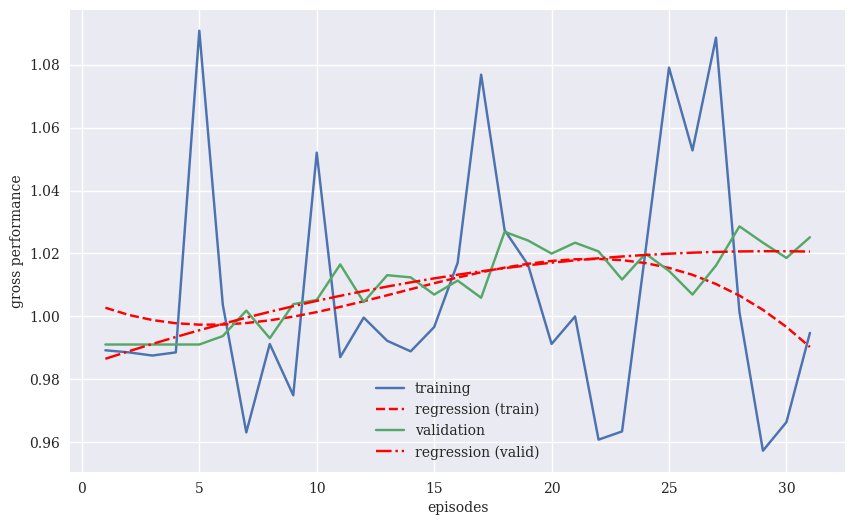

In [66]:
tradingbot.plot_performance(agent)

In [67]:
import backtest as bt

In [68]:
env = test_env

In [69]:
bt.backtest(agent, env)

In [70]:
env.data['p'].iloc[env.lags:].value_counts()

-1    223
 1    114
Name: p, dtype: int64

In [71]:
sum(env.data['p'].iloc[env.lags:].diff() != 0)

52

In [72]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).sum(
        ).apply(np.exp)

r   1.02273
s   1.01586
dtype: float64

In [73]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).sum(
        ).apply(np.exp) - 1

r   0.02273
s   0.01586
dtype: float64

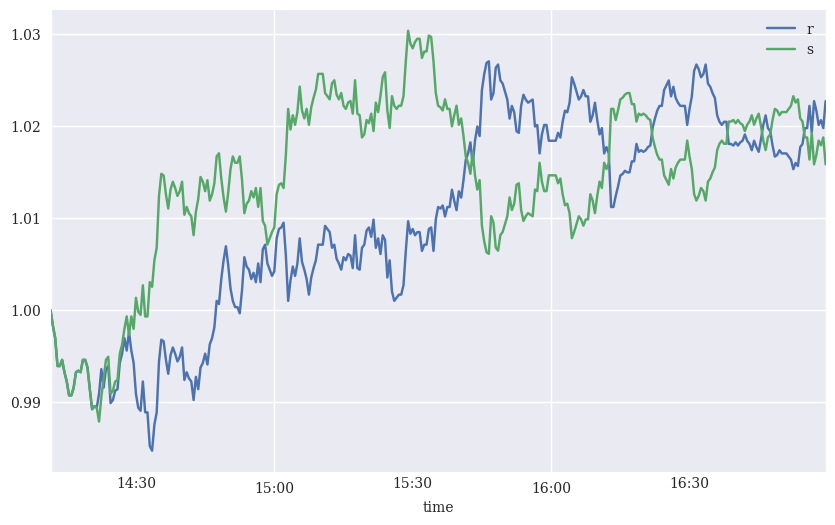

In [74]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

## Deployment

In [78]:
from oandatb import OandaTradingBot

In [80]:
otb = OandaTradingBot('./aiif.cfg', agent, '3s',
                      25000, verbose=False)

In [81]:
otb.tick_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame


In [82]:
%time otb.stream_data(agent.learn_env.symbol, stop=1000)


2023-07-05T10:20:30.133810017Z | *** GOING LONG (1) ***
2023-07-05T10:20:30.133810017Z | PROFIT/LOSS=0.00 | CUMULATIVE=0.00
CPU times: user 25 s, sys: 4.98 s, total: 30 s
Wall time: 25min 53s


In [ ]:
print('\n' + 75 * '=')
print('*** CLOSING OUT ***')
order = otb.create_order(otb.symbol,
                units=-otb.position * otb.units,
                suppress=True, ret=True)
otb.report_trade(otb.time, 'NEUTRAL', order)
if otb.verbose:
    pprint(order)
print(75 * '=')

In [ ]:
pl = np.array(otb.pl)

In [ ]:
pl

In [ ]:
pl.cumsum()

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>